In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-object-detection/data/sample_submission.csv
/kaggle/input/car-object-detection/data/train_solution_bounding_boxes (1).csv
/kaggle/input/car-object-detection/data/testing_images/vid_5_26420.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_31520.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29420.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_31720.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_26560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_27840.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_28560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_28360.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_25240.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29020.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_30720.jpg
/kaggle/

In [1]:
import os

folder_dir = '/kaggle/input/car-object-detection/data'

train = folder_dir + '/'+ 'training_images'
test = folder_dir + '/' + 'testing_images'
train_list=os.listdir(train)
test_list=os.listdir(test)

In [2]:
import pandas as pd

train_csv = pd.read_csv("/kaggle/input/car-object-detection/data/train_solution_bounding_boxes (1).csv")
train_csv

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864


In [3]:
zero_train_list = []
one_train_list = []
over_two_train_list = []

train_label = train_csv.image.tolist()

for val in train_list:
    count = 0
    if val not in train_label:
        zero_train_list.append(val)
    else:
        for v in train_label:
            if val == v:
                count += 1
        if count >= 2:
            over_two_train_list.append(val)
        else:
            one_train_list.append(val)

In [4]:
zero_train_list = sorted(zero_train_list)
one_train_list = sorted(one_train_list)
over_two_train_list = sorted(over_two_train_list)

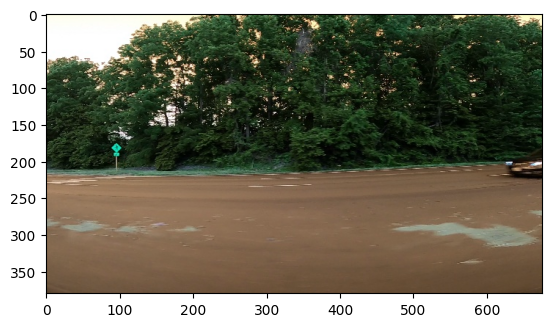

In [5]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(cv2.imread(train + '/' + 'vid_4_3420.jpg'))

# plt.figure(figsize=(30,30))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(cv2.imread(train + '/' + zero_train_list[i + 425]))
#     plt.xlabel(zero_train_list[i + 425])
# plt.show()

In [6]:
bbox_check = ['vid_4_13580.jpg','vid_4_16400.jpg','vid_4_17360.jpg']

result = train_csv[train_csv['image'] == bbox_check[2]]
print(result)

               image  xmin        ymin       xmax        ymax
151  vid_4_17360.jpg   0.0  193.881918  60.164978  235.452059


In [7]:
bbox = [int(result.xmin), int(result.ymin), int(result.xmax), int(result.ymax)]
bbox

/tmp/ipykernel_36/1579934859.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  bbox = [int(result.xmin), int(result.ymin), int(result.xmax), int(result.ymax)]


[0, 193, 60, 235]

[0, 193, 60, 235]


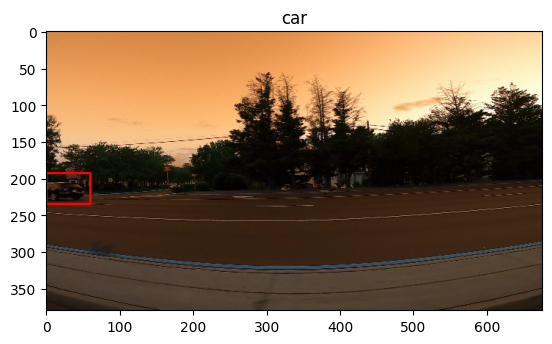

In [8]:
import torch

image = cv2.imread(train + '/' + 'vid_4_17360.jpg')

def draw_bbox(image, bbox, label):
    """
    이미지 및 바운딩 박스를 그려주는 함수
    """
    # 바운딩 박스 좌표를 이미지 크기에 맞게 스케일링하고 정수형으로 변환
    # width, height = image.shape[1], image.shape[0]
#     bbox = (bbox * torch.tensor([width, height, width, height]).float()).numpy().astype(int)
    # print(bbox)
    image = cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)
    
    # 클래스 라벨을 타이틀로 설정
    plt.title(label)
    plt.imshow(image)
    plt.show()
    
draw_bbox(image, bbox, 'car')

In [9]:
image_width = 676
image_height = 380

# x_center, y_center, width, height 계산
train_csv['x_center'] = (train_csv['xmin'] + train_csv['xmax']) / 2
train_csv['y_center'] = (train_csv['ymin'] + train_csv['ymax']) / 2
train_csv['width'] = train_csv['xmax'] - train_csv['xmin']
train_csv['height'] = train_csv['ymax'] - train_csv['ymin']

# YOLO 형식은 좌표를 이미지의 비율로 나타냅니다. 이를 위해 이미지의 너비와 높이를 사용해 정규화.
train_csv['x_center'] = train_csv['x_center'] / image_width
train_csv['y_center'] = train_csv['y_center'] / image_height
train_csv['width'] = train_csv['width'] / image_width
train_csv['height'] = train_csv['height'] / image_height

# 필요한 열만 추출 (image, x_center, y_center, width, height 순으로 저장)
yolo_df =train_csv[['image', 'x_center', 'y_center', 'width', 'height']]

# 결과 출력
yolo_df



# CSV로 저장 (원하는 경우)
# yolo_df.to_csv('yolo_formatted.csv', index=False)

,image,x_center,y_center,width,height
0,vid_4_1000.jpg,0.450434,0.539817,0.068741,0.095238
1,vid_4_10000.jpg,0.100217,0.557191,0.155572,0.129987
2,vid_4_10040.jpg,0.444645,0.543678,0.181621,0.157014
3,vid_4_10020.jpg,0.833213,0.531451,0.197540,0.155727
4,vid_4_10060.jpg,0.110347,0.559122,0.171491,0.136422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.036417,0.571770,0.072833,0.099741
555,vid_4_9880.jpg,0.640932,0.535500,0.305899,0.247409
556,vid_4_9900.jpg,0.104880,0.536148,0.209760,0.186528
557,vid_4_9960.jpg,0.816824,0.527728,0.191551,0.148964


In [10]:
!curl -L "https://app.roboflow.com/ds/MvB7XmUAR3?key=byuSDOpxiV" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   4082      0 --:--:-- --:--:-- --:--:--  4099
100  421k  100  421k    0     0   818k      0 --:--:-- --:--:-- --:--:-- 3293k
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: train/
   creating: train/images/
 extracting: train/images/vid_4_12100_jpg.rf.06c290ddf38cde927f5c6c909938ce62.jpg  
 extracting: train/images/vid_4_12120_jpg.rf.5e9934665c4dcb97c34cf3a6991264a6.jpg  
 extracting: train/images/vid_4_12460_jpg.rf.974772733967a8b74ffb3f46be741509.jpg  
 extracting: train/images/vid_4_17520_jpg.rf.86e6762b15bed5241fca2c7462c2a819.jpg  
 extracting: train/images/vid_4_28380_jpg.rf.d60181de894367eba084c131f7353465.jpg  
 extracting: train/images/vid_4_28400_jpg.rf.56f2c03e6b3604fb24c62a9f0bf5f952.jp

In [11]:
label_list = os.listdir('/kaggle/working/train/labels')
# print(label_list)
for i in range(len(label_list)):
    f = open(f"/kaggle/working/train/labels/{label_list[i]}", 'r')
    data = f.read().split()
    yolo_df.loc[len(yolo_df)] = [label_list[i].split('.')[0].replace('_jpg', '.jpg'), data[1], data[2], data[3], data[4]]

yolo_df

/tmp/ipykernel_36/576640529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yolo_df.loc[len(yolo_df)] = [label_list[i].split('.')[0].replace('_jpg', '.jpg'), data[1], data[2], data[3], data[4]]
/tmp/ipykernel_36/576640529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yolo_df.loc[len(yolo_df)] = [label_list[i].split('.')[0].replace('_jpg', '.jpg'), data[1], data[2], data[3], data[4]]
/tmp/ipykernel_36/576640529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,image,x_center,y_center,width,height
0,vid_4_1000.jpg,0.450434,0.539817,0.068741,0.095238
1,vid_4_10000.jpg,0.100217,0.557191,0.155572,0.129987
2,vid_4_10040.jpg,0.444645,0.543678,0.181621,0.157014
3,vid_4_10020.jpg,0.833213,0.531451,0.19754,0.155727
4,vid_4_10060.jpg,0.110347,0.559122,0.171491,0.136422
...,...,...,...,...,...
563,vid_4_17520.jpg,0.9647485207100591,0.5460526315789473,0.07051775147928994,0.1535
564,vid_4_28380.jpg,0.9795414201183431,0.49123684210526314,0.0409319526627219,0.05263157894736842
565,vid_4_9740.jpg,0.260103550295858,0.5613947368421053,0.14053254437869822,0.10526315789473684
566,vid_4_28420.jpg,0.8234763313609467,0.49781578947368416,0.04437869822485207,0.05702631578947369


In [12]:
yolo_list = yolo_df.image.to_list()
yolo_list = sorted(yolo_list)

train_data = []
for val in train_list:
    if val in yolo_list:
        train_data.append(val)

train_data = sorted(train_data)

In [13]:
from sklearn.model_selection import train_test_split

# 이미지별로 그룹화하여 중복 제거
unique_images = yolo_df['image'].unique()

# train_test_split을 이용해 train과 validation 세트로 나누기 (80% train, 20% validation)
train_images, val_images = train_test_split(unique_images, test_size=0.2, random_state=42)

# train 이미지에 해당하는 데이터
train_df = yolo_df[yolo_df['image'].isin(train_images)]

# validation 이미지에 해당하는 데이터
val_df = yolo_df[yolo_df['image'].isin(val_images)]

train_label_temp = train_df.image.to_list()
train_image = []
val_image = []
for val in train_data:
    if val in train_label_temp:
        train_image.append(val)
    else:
        val_image.append(val)
        


In [14]:
train_df

,image,x_center,y_center,width,height
0,vid_4_1000.jpg,0.450434,0.539817,0.068741,0.095238
1,vid_4_10000.jpg,0.100217,0.557191,0.155572,0.129987
2,vid_4_10040.jpg,0.444645,0.543678,0.181621,0.157014
4,vid_4_10060.jpg,0.110347,0.559122,0.171491,0.136422
6,vid_4_10120.jpg,0.350217,0.562339,0.201158,0.173745
...,...,...,...,...,...
561,vid_4_28400.jpg,0.9035946745562131,0.4824473684210527,0.06656804733727811,0.06139473684210526
563,vid_4_17520.jpg,0.9647485207100591,0.5460526315789473,0.07051775147928994,0.1535
565,vid_4_9740.jpg,0.260103550295858,0.5613947368421053,0.14053254437869822,0.10526315789473684
566,vid_4_28420.jpg,0.8234763313609467,0.49781578947368416,0.04437869822485207,0.05702631578947369


In [15]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16954, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 16954 (delta 76), reused 95 (delta 45), pack-reused 16805 (from 1)
Receiving objects: 100% (16954/16954), 15.71 MiB | 31.48 MiB/s, done.
Resolving deltas: 100% (11609/11609), done.


In [16]:
# git clone 해온 yolov5 폴더로 이동
%cd yolov5

# yolov5 실행에 필요한 requirements 설치
%pip install -qr requirements.txt

/kaggle/working/yolov5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.9.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [17]:
# 필요한 라이브러리 import
import torch
from IPython.display import Image, clear_output

In [18]:
%mkdir /kaggle/working/yolov5/car_detect
%cd /kaggle/working/yolov5/car_detect

/kaggle/working/yolov5/car_detect


In [19]:
%mkdir /kaggle/working/yolov5/car_detect/images

In [20]:
from PIL import Image

output_dir= '/kaggle/working/yolov5/car_detect/images'  # 저장할 디렉토리

# 이미지 경로에서 이미지를 불러오고, 새로운 경로에 저장
for val in train_image:
    img_path = train + '/' + val
    img = Image.open(img_path)  # 이미지 열기
    file_name = os.path.basename(img_path)  # 파일 이름만 추출 (image1.jpg 등)
    # 저장할 경로에 파일명과 확장자를 포함해 줍니다.
    output_path = os.path.join(output_dir, file_name)
    # 이미지를 새로운 경로에 저장
    img.save(output_path)
    
# 이미지 경로에서 이미지를 불러오고, 새로운 경로에 저장
for val in val_image:
    img_path = train + '/' + val
    img = Image.open(img_path)  # 이미지 열기
    file_name = os.path.basename(img_path)  # 파일 이름만 추출 (image1.jpg 등)
    # 저장할 경로에 파일명과 확장자를 포함해 줍니다.
    output_path = os.path.join(output_dir, file_name)
    # 이미지를 새로운 경로에 저장
    img.save(output_path)

In [21]:
%mkdir /kaggle/working/yolov5/car_detect/labels

In [22]:
train_df_sorted = train_df.sort_values(by='image')
val_df_sorted = val_df.sort_values(by='image')

In [23]:
train_df_sorted['class'] = 0  # 자동차 클래스 번호 0

# 저장할 디렉토리 설정
output_dir = '/kaggle/working/yolov5/car_detect/labels'  # YOLO 라벨을 저장할 디렉토리

# 이미지별로 그룹화하여 YOLO 라벨 파일 생성
for image_name, group in train_df_sorted.groupby('image'):
    # YOLO 형식: 클래스 번호, x_center, y_center, width, height (공백으로 구분)
    yolo_data = group[['class', 'x_center', 'y_center', 'width', 'height']].values
    
    # YOLO 형식의 라벨을 저장할 파일 경로 생성
    label_file_path = os.path.join(output_dir, image_name.replace('.jpg', '.txt'))
    
    # 파일에 YOLO 형식으로 저장
    with open(label_file_path, 'w') as f:
        for row in yolo_data:
            row_str = ' '.join(map(str, row))  # 각 숫자를 공백으로 구분하여 문자열로 변환
            f.write(f"{row_str}\n")  # YOLO 형식의 라벨 한 줄씩 기록
            

val_df_sorted['class'] = 0  # 자동차 클래스 번호 0

# 저장할 디렉토리 설정
output_dir = '/kaggle/working/yolov5/car_detect/labels'  # YOLO 라벨을 저장할 디렉토리

# 이미지별로 그룹화하여 YOLO 라벨 파일 생성
for image_name, group in val_df_sorted.groupby('image'):
    # YOLO 형식: 클래스 번호, x_center, y_center, width, height (공백으로 구분)
    yolo_data = group[['class', 'x_center', 'y_center', 'width', 'height']].values
    
    # YOLO 형식의 라벨을 저장할 파일 경로 생성
    label_file_path = os.path.join(output_dir, image_name.replace('.jpg', '.txt'))
    
    # 파일에 YOLO 형식으로 저장
    with open(label_file_path, 'w') as f:
        for row in yolo_data:
            row_str = ' '.join(map(str, row))  # 각 숫자를 공백으로 구분하여 문자열로 변환
            f.write(f"{row_str}\n")  # YOLO 형식의 라벨 한 줄씩 기록

In [25]:
from sklearn.model_selection import KFold
import numpy as np
from glob import glob

# 이미지 파일 경로 리스트 생성
img_list = np.array(glob('/kaggle/working/yolov5/car_detect/images/*.jpg'))

# K-Fold 설정
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [27]:
%cd /kaggle/working/yolov5/

/kaggle/working/yolov5


In [29]:
!echo "train: ./data/train\nval: ./data/val\nnc: 80\nnames: ['car', 'person', 'dog']" > /kaggle/working/yolov5/car_detect/data.yaml

In [30]:
%cat /kaggle/working/yolov5/car_detect/data.yaml

train: ./data/train\nval: ./data/val\nnc: 80\nnames: ['car', 'person', 'dog']


In [31]:
with open('/kaggle/working/yolov5/car_detect/data.yaml', 'w') as f:
    f.write('train: /kaggle/working/yolov5/car_detect/train/images\n')
    f.write('test: /kaggle/working/yolov5/car_detect/test/images\n')
    f.write('val: /kaggle/working/yolov5/car_detect/valid/images\n')
    f.write('nc: 1\n')
    f.write("names: ['car_detect']\n")

In [32]:
%cat /kaggle/working/yolov5/car_detect/data.yaml

train: /kaggle/working/yolov5/car_detect/train/images
test: /kaggle/working/yolov5/car_detect/test/images
val: /kaggle/working/yolov5/car_detect/valid/images
nc: 1
names: ['car_detect']


In [33]:
import yaml

with open('/kaggle/working/yolov5/car_detect/data.yaml', 'r') as stream:
    num_calsses = str(yaml.safe_load(stream)['nc'])

%cat /kaggle/working/yolov5/models/yolov5s.yaml

# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4],

In [34]:
# 파일 작성
with open('/kaggle/working/yolov5/models/custom_yolo5s.yaml', 'w') as f:
    f.write("# Parameters\n")
    f.write(f"nc: {{num_classes}}  # number of classes\n")
    f.write("depth_multiple: 0.33  # model depth multiple\n")
    f.write("width_multiple: 0.50  # layer channel multiple\n")
    f.write("anchors:\n")
    f.write("  - [10,13, 16,30, 33,23]  # P3/8\n")
    f.write("  - [30,61, 62,45, 59,119]  # P4/16\n")
    f.write("  - [116,90, 156,198, 373,326]  # P5/32\n\n")

    f.write("# YOLOv5 v6.0 backbone\n")
    f.write("backbone:\n")
    f.write("  # [from, number, module, args]\n")
    f.write("  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2\n")
    f.write("   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4\n")
    f.write("   [-1, 3, C3, [128]],\n")
    f.write("   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8\n")
    f.write("   [-1, 6, C3, [256]],\n")
    f.write("   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16\n")
    f.write("   [-1, 9, C3, [512]],\n")
    f.write("   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32\n")
    f.write("   [-1, 3, C3, [1024]],\n")
    f.write("   [-1, 1, SPPF, [1024, 5]],  # 9\n")
    f.write("  ]\n\n")

    f.write("# YOLOv5 v6.0 head\n")
    f.write("head:\n")
    f.write("  [[-1, 1, Conv, [512, 1, 1]],\n")
    f.write("   [-1, 1, nn.Upsample, [None, 2, 'nearest']],\n")
    f.write("   [[-1, 6], 1, Concat, [1]],  # cat backbone P4\n")
    f.write("   [-1, 3, C3, [512, False]],  # 13\n\n")

    f.write("   [-1, 1, Conv, [256, 1, 1]],\n")
    f.write("   [-1, 1, nn.Upsample, [None, 2, 'nearest']],\n")
    f.write("   [[-1, 4], 1, Concat, [1]],  # cat backbone P3\n")
    f.write("   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)\n\n")

    f.write("   [-1, 1, Conv, [256, 3, 2]],\n")
    f.write("   [[-1, 14], 1, Concat, [1]],  # cat head P4\n")
    f.write("   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)\n\n")

    f.write("   [-1, 1, Conv, [512, 3, 2]],\n")
    f.write("   [[-1, 10], 1, Concat, [1]],  # cat head P5\n")
    f.write("   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)\n\n")

    f.write("   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)\n")
    f.write("  ]\n")

In [35]:
%cat /kaggle/working/yolov5/models/custom_yolo5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C

In [36]:
fold = 1
for train_index, val_index in kf.split(img_list):
    print(f'Fold {fold} 시작...')

    # 학습 및 검증 이미지 리스트 생성
    train_img_list = img_list[train_index]
    val_img_list = img_list[val_index]

    # 이미지 경로를 txt 파일로 저장
    with open(f'/kaggle/working/yolov5/car_detect/train_fold{fold}.txt', 'w') as f:
        f.write('\n'.join(train_img_list))
    with open(f'/kaggle/working/yolov5/car_detect/val_fold{fold}.txt', 'w') as f:
        f.write('\n'.join(val_img_list))

    # 각 폴드에 대한 data.yaml 파일 생성
    with open(f'/kaggle/working/yolov5/car_detect/data_fold{fold}.yaml', 'w') as f:
        f.write(f'train: /kaggle/working/yolov5/car_detect/train_fold{fold}.txt\n')
        f.write(f'val: /kaggle/working/yolov5/car_detect/val_fold{fold}.txt\n')
        f.write('nc: 1\n')
        f.write("names: ['car_detect']\n")

    # YOLOv5 학습 실행
    !python train.py --img 640 --batch 32 --epochs 50 \
        --data ./car_detect/data_fold{fold}.yaml \
        --cfg ./models/custom_yolo5s.yaml \
        --weights '' \
        --name car_detect_results_fold{fold} \
        --cache

    fold += 1

Fold 1 시작...
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=, cfg=./models/custom_yolo5s.yaml, data=./car_detect/data_fold1.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=car_detect_results_fold1, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, 

In [49]:
import pandas as pd

results = []

for i in range(1, k_folds + 1):
    # 각 폴드의 결과 파일 경로
    results_file = f'runs/train/car_detect_results_fold{i}/results.csv'
    df = pd.read_csv(results_file)

    # 마지막 에포크의 mAP 값 추출
    map50 = df['     metrics/mAP_0.5'].iloc[-1]
    map50_95 = df['metrics/mAP_0.5:0.95'].iloc[-1]
    
    results.append({'Fold': i, 'mAP@0.5': map50, 'mAP@0.5:0.95': map50_95})

# 결과를 데이터프레임으로 표시
results_df = pd.DataFrame(results)
print(results_df)

# 평균 성능 계산
mean_map50 = results_df['mAP@0.5'].mean()
# mean_map50_95 = results_df['mAP@0.5:0.95'].mean()
print(f'평균 mAP@0.5 : {mean_map50:.4f}')
# print(f'평균 mAP@0.5:0.95 : {mean_map50_95:.4f}')

   Fold  mAP@0.5  mAP@0.5:0.95
0     1  0.98849       0.57044
1     2  0.95756       0.56733
2     3  0.97030       0.59838
3     4  0.96313       0.58238
4     5  0.94829       0.58856
평균 mAP@0.5 : 0.9656


In [19]:
%mkdir /kaggle/working/yolov5/car_detect/train
%mkdir /kaggle/working/yolov5/car_detect/train/images

In [20]:
from PIL import Image

output_dir_train = '/kaggle/working/yolov5/car_detect/train/images'  # 저장할 디렉토리

# 이미지 경로에서 이미지를 불러오고, 새로운 경로에 저장
for val in train_image:
    img_path = train + '/' + val
    img = Image.open(img_path)  # 이미지 열기
    file_name = os.path.basename(img_path)  # 파일 이름만 추출 (image1.jpg 등)
    # 저장할 경로에 파일명과 확장자를 포함해 줍니다.
    output_path = os.path.join(output_dir_train, file_name)
    # 이미지를 새로운 경로에 저장
    img.save(output_path)

In [21]:
%mkdir /kaggle/working/yolov5/car_detect/valid
%mkdir /kaggle/working/yolov5/car_detect/valid/images

In [22]:
output_dir_val = '/kaggle/working/yolov5/car_detect/valid/images'  # 저장할 디렉토리

# 이미지 경로에서 이미지를 불러오고, 새로운 경로에 저장
for val in val_image:
    img_path = train + '/' + val
    img = Image.open(img_path)  # 이미지 열기
    file_name = os.path.basename(img_path)  # 파일 이름만 추출 (image1.jpg 등)
    # 저장할 경로에 파일명과 확장자를 포함해 줍니다.
    output_path = os.path.join(output_dir_val, file_name)
    # 이미지를 새로운 경로에 저장
    img.save(output_path)

In [23]:
%mkdir /kaggle/working/yolov5/car_detect/test
%mkdir /kaggle/working/yolov5/car_detect/test/images

In [24]:
output_dir_test = '/kaggle/working/yolov5/car_detect/test/images'  # 저장할 디렉토리

# 이미지 경로에서 이미지를 불러오고, 새로운 경로에 저장
for val in test_list:
    img_path = test + '/' + val
    img = Image.open(img_path)  # 이미지 열기
    file_name = os.path.basename(img_path)  # 파일 이름만 추출 (image1.jpg 등)
    # 저장할 경로에 파일명과 확장자를 포함해 줍니다.
    output_path = os.path.join(output_dir_test, file_name)
    # 이미지를 새로운 경로에 저장
    img.save(output_path)

In [25]:
%mkdir /kaggle/working/yolov5/car_detect/train/labels

In [26]:
train_df_sorted = train_df.sort_values(by='image')
train_df_sorted

,image,x_center,y_center,width,height
0,vid_4_1000.jpg,0.450434,0.539817,0.068741,0.095238
1,vid_4_10000.jpg,0.100217,0.557191,0.155572,0.129987
2,vid_4_10040.jpg,0.444645,0.543678,0.181621,0.157014
4,vid_4_10060.jpg,0.110347,0.559122,0.171491,0.136422
6,vid_4_10120.jpg,0.350217,0.562339,0.201158,0.173745
...,...,...,...,...,...
554,vid_4_9860.jpg,0.036417,0.57177,0.072833,0.099741
555,vid_4_9880.jpg,0.640932,0.5355,0.305899,0.247409
556,vid_4_9900.jpg,0.10488,0.536148,0.20976,0.186528
557,vid_4_9960.jpg,0.816824,0.527728,0.191551,0.148964


In [27]:
train_df_sorted['class'] = 0  # 자동차 클래스 번호 0

# 저장할 디렉토리 설정
output_dir = '/kaggle/working/yolov5/car_detect/train/labels'  # YOLO 라벨을 저장할 디렉토리

# 이미지별로 그룹화하여 YOLO 라벨 파일 생성
for image_name, group in train_df_sorted.groupby('image'):
    # YOLO 형식: 클래스 번호, x_center, y_center, width, height (공백으로 구분)
    yolo_data = group[['class', 'x_center', 'y_center', 'width', 'height']].values
    
    # YOLO 형식의 라벨을 저장할 파일 경로 생성
    label_file_path = os.path.join(output_dir, image_name.replace('.jpg', '.txt'))
    
    # 파일에 YOLO 형식으로 저장
    with open(label_file_path, 'w') as f:
        for row in yolo_data:
            row_str = ' '.join(map(str, row))  # 각 숫자를 공백으로 구분하여 문자열로 변환
            f.write(f"{row_str}\n")  # YOLO 형식의 라벨 한 줄씩 기록

In [28]:
%mkdir /kaggle/working/yolov5/car_detect/valid/labels

In [29]:
val_df_sorted = val_df.sort_values(by='image')
val_df_sorted

,image,x_center,y_center,width,height
3,vid_4_10020.jpg,0.833213,0.531451,0.19754,0.155727
5,vid_4_10100.jpg,0.761577,0.517294,0.198987,0.189189
9,vid_4_1040.jpg,0.219609,0.5514,0.09479,0.10296
15,vid_4_10980.jpg,0.678003,0.559765,0.176556,0.127413
22,vid_4_11400.jpg,0.562952,0.561052,0.146165,0.109395
...,...,...,...,...,...
531,vid_4_960.jpg,0.689731,0.519956,0.084487,0.073834
546,vid_4_9700.jpg,0.934814,0.536148,0.130371,0.103627
541,vid_4_9720.jpg,0.612891,0.548454,0.156591,0.089378
547,vid_4_9780.jpg,0.384559,0.559464,0.163146,0.101036


In [30]:
val_df_sorted['class'] = 0  # 자동차 클래스 번호 0

# 저장할 디렉토리 설정
output_dir = '/kaggle/working/yolov5/car_detect/valid/labels'  # YOLO 라벨을 저장할 디렉토리

# 이미지별로 그룹화하여 YOLO 라벨 파일 생성
for image_name, group in val_df_sorted.groupby('image'):
    # YOLO 형식: 클래스 번호, x_center, y_center, width, height (공백으로 구분)
    yolo_data = group[['class', 'x_center', 'y_center', 'width', 'height']].values
    
    # YOLO 형식의 라벨을 저장할 파일 경로 생성
    label_file_path = os.path.join(output_dir, image_name.replace('.jpg', '.txt'))
    
    # 파일에 YOLO 형식으로 저장
    with open(label_file_path, 'w') as f:
        for row in yolo_data:
            row_str = ' '.join(map(str, row))  # 각 숫자를 공백으로 구분하여 문자열로 변환
            f.write(f"{row_str}\n")  # YOLO 형식의 라벨 한 줄씩 기록

In [31]:
from glob import glob

# 다운로드한 데이터를 train, vaild, test 각각의 변수에 분할
train_img_list = glob('/kaggle/working/yolov5/car_detect/train/images/*.jpg')
vaild_img_list = glob('/kaggle/working/yolov5/car_detect/valid/images/*.jpg')
test_img_list = glob('/kaggle/working/yolov5/car_detect/test/images/*.jpg')

# 데이터가 각각의 변수 안에 잘 들어갔는지 확인
print(len(train_img_list), len(vaild_img_list), len(test_img_list))

288 73 175


In [32]:
import yaml

# txt 파일 경로
with open('/kaggle/working/yolov5/car_detect/train.txt', 'w') as f:
    # 이미지 파일 경로
    f.write('\n'.join(train_img_list) + '\n')

# txt 파일 경로
with open('/kaggle/working/yolov5/car_detect/test.txt', 'w') as f:
    # 이미지 파일 경로
    f.write('\n'.join(test_img_list) + '\n')

# txt 파일 경로
with open('/kaggle/working/yolov5/car_detect/vaild.txt', 'w') as f:
    # 이미지 파일 경로
    f.write('\n'.join(vaild_img_list) + '\n')

In [33]:
!echo "train: ./data/train\nval: ./data/val\nnc: 80\nnames: ['car', 'person', 'dog']" > /kaggle/working/yolov5/car_detect/data.yaml

In [34]:
with open('/kaggle/working/yolov5/car_detect/data.yaml', 'w') as f:
    f.write('train: /kaggle/working/yolov5/car_detect/train/images\n')
    f.write('test: /kaggle/working/yolov5/car_detect/test/images\n')
    f.write('val: /kaggle/working/yolov5/car_detect/valid/images\n')
    f.write('nc: 1\n')
    f.write("names: ['car_detect']\n")

In [35]:
%cat /kaggle/working/yolov5/car_detect/data.yaml

train: /kaggle/working/yolov5/car_detect/train/images
test: /kaggle/working/yolov5/car_detect/test/images
val: /kaggle/working/yolov5/car_detect/valid/images
nc: 1
names: ['car_detect']


In [36]:
import yaml

with open('/kaggle/working/yolov5/car_detect/data.yaml', 'r') as stream:
    num_calsses = str(yaml.safe_load(stream)['nc'])

%cat /kaggle/working/yolov5/models/yolov5s.yaml

# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4],

In [37]:
# 파일 작성
with open('/kaggle/working/yolov5/models/custom_yolo5s.yaml', 'w') as f:
    f.write("# Parameters\n")
    f.write(f"nc: {{num_classes}}  # number of classes\n")
    f.write("depth_multiple: 0.33  # model depth multiple\n")
    f.write("width_multiple: 0.50  # layer channel multiple\n")
    f.write("anchors:\n")
    f.write("  - [10,13, 16,30, 33,23]  # P3/8\n")
    f.write("  - [30,61, 62,45, 59,119]  # P4/16\n")
    f.write("  - [116,90, 156,198, 373,326]  # P5/32\n\n")

    f.write("# YOLOv5 v6.0 backbone\n")
    f.write("backbone:\n")
    f.write("  # [from, number, module, args]\n")
    f.write("  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2\n")
    f.write("   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4\n")
    f.write("   [-1, 3, C3, [128]],\n")
    f.write("   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8\n")
    f.write("   [-1, 6, C3, [256]],\n")
    f.write("   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16\n")
    f.write("   [-1, 9, C3, [512]],\n")
    f.write("   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32\n")
    f.write("   [-1, 3, C3, [1024]],\n")
    f.write("   [-1, 1, SPPF, [1024, 5]],  # 9\n")
    f.write("  ]\n\n")

    f.write("# YOLOv5 v6.0 head\n")
    f.write("head:\n")
    f.write("  [[-1, 1, Conv, [512, 1, 1]],\n")
    f.write("   [-1, 1, nn.Upsample, [None, 2, 'nearest']],\n")
    f.write("   [[-1, 6], 1, Concat, [1]],  # cat backbone P4\n")
    f.write("   [-1, 3, C3, [512, False]],  # 13\n\n")

    f.write("   [-1, 1, Conv, [256, 1, 1]],\n")
    f.write("   [-1, 1, nn.Upsample, [None, 2, 'nearest']],\n")
    f.write("   [[-1, 4], 1, Concat, [1]],  # cat backbone P3\n")
    f.write("   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)\n\n")

    f.write("   [-1, 1, Conv, [256, 3, 2]],\n")
    f.write("   [[-1, 14], 1, Concat, [1]],  # cat head P4\n")
    f.write("   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)\n\n")

    f.write("   [-1, 1, Conv, [512, 3, 2]],\n")
    f.write("   [[-1, 10], 1, Concat, [1]],  # cat head P5\n")
    f.write("   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)\n\n")

    f.write("   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)\n")
    f.write("  ]\n")


In [38]:
%cat /kaggle/working/yolov5/models/custom_yolo5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C

In [39]:
%cd /kaggle/working/yolov5/

# 모델 학습
!python train.py --img 640 --batch 32 --epochs 50 --data ./car_detect/data.yaml --cfg ./models/custom_yolo5s.yaml --weights '' --name car_detect_results --cache

/kaggle/working/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=, cfg=./models/custom_yolo5s.yaml, data=./car_detect/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=car_detect_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, up

In [40]:
!ls /kaggle/working/yolov5/runs/train/car_detect_results/

F1_curve.png					   results.csv
PR_curve.png					   results.png
P_curve.png					   train_batch0.jpg
R_curve.png					   train_batch1.jpg
confusion_matrix.png				   train_batch2.jpg
events.out.tfevents.1726135873.63c25ec0eb60.132.0  val_batch0_labels.jpg
hyp.yaml					   val_batch0_pred.jpg
labels.jpg					   val_batch1_labels.jpg
labels_correlogram.jpg				   val_batch1_pred.jpg
opt.yaml					   weights


In [42]:
from IPython.display import Image, clear_output

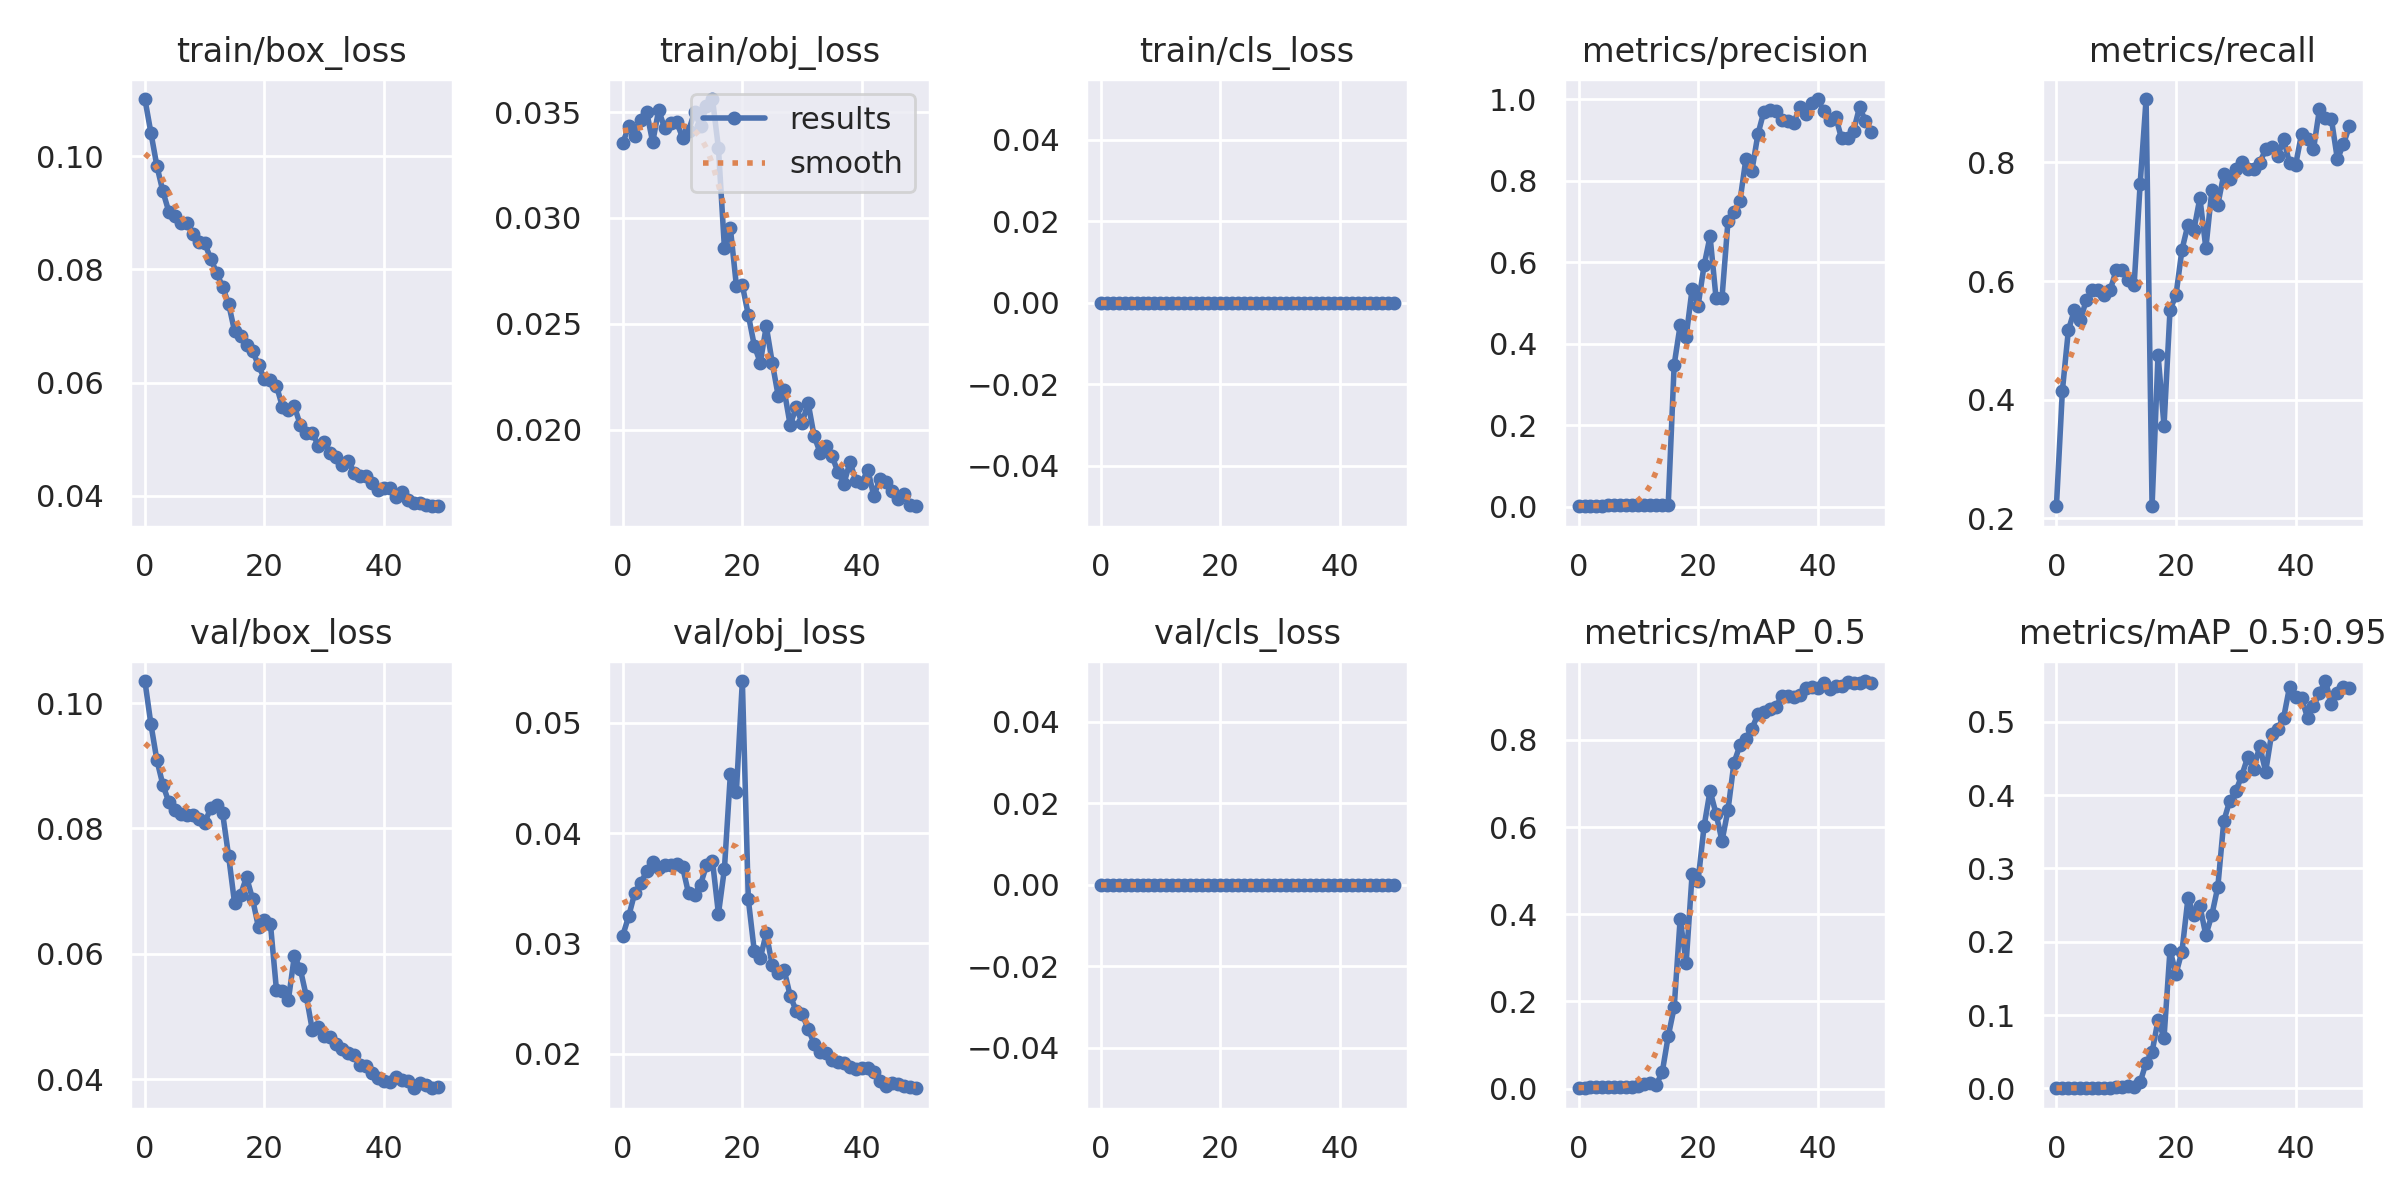

In [43]:
Image(filename='/kaggle/working/yolov5/runs/train/car_detect_results/results.png', width=1000)

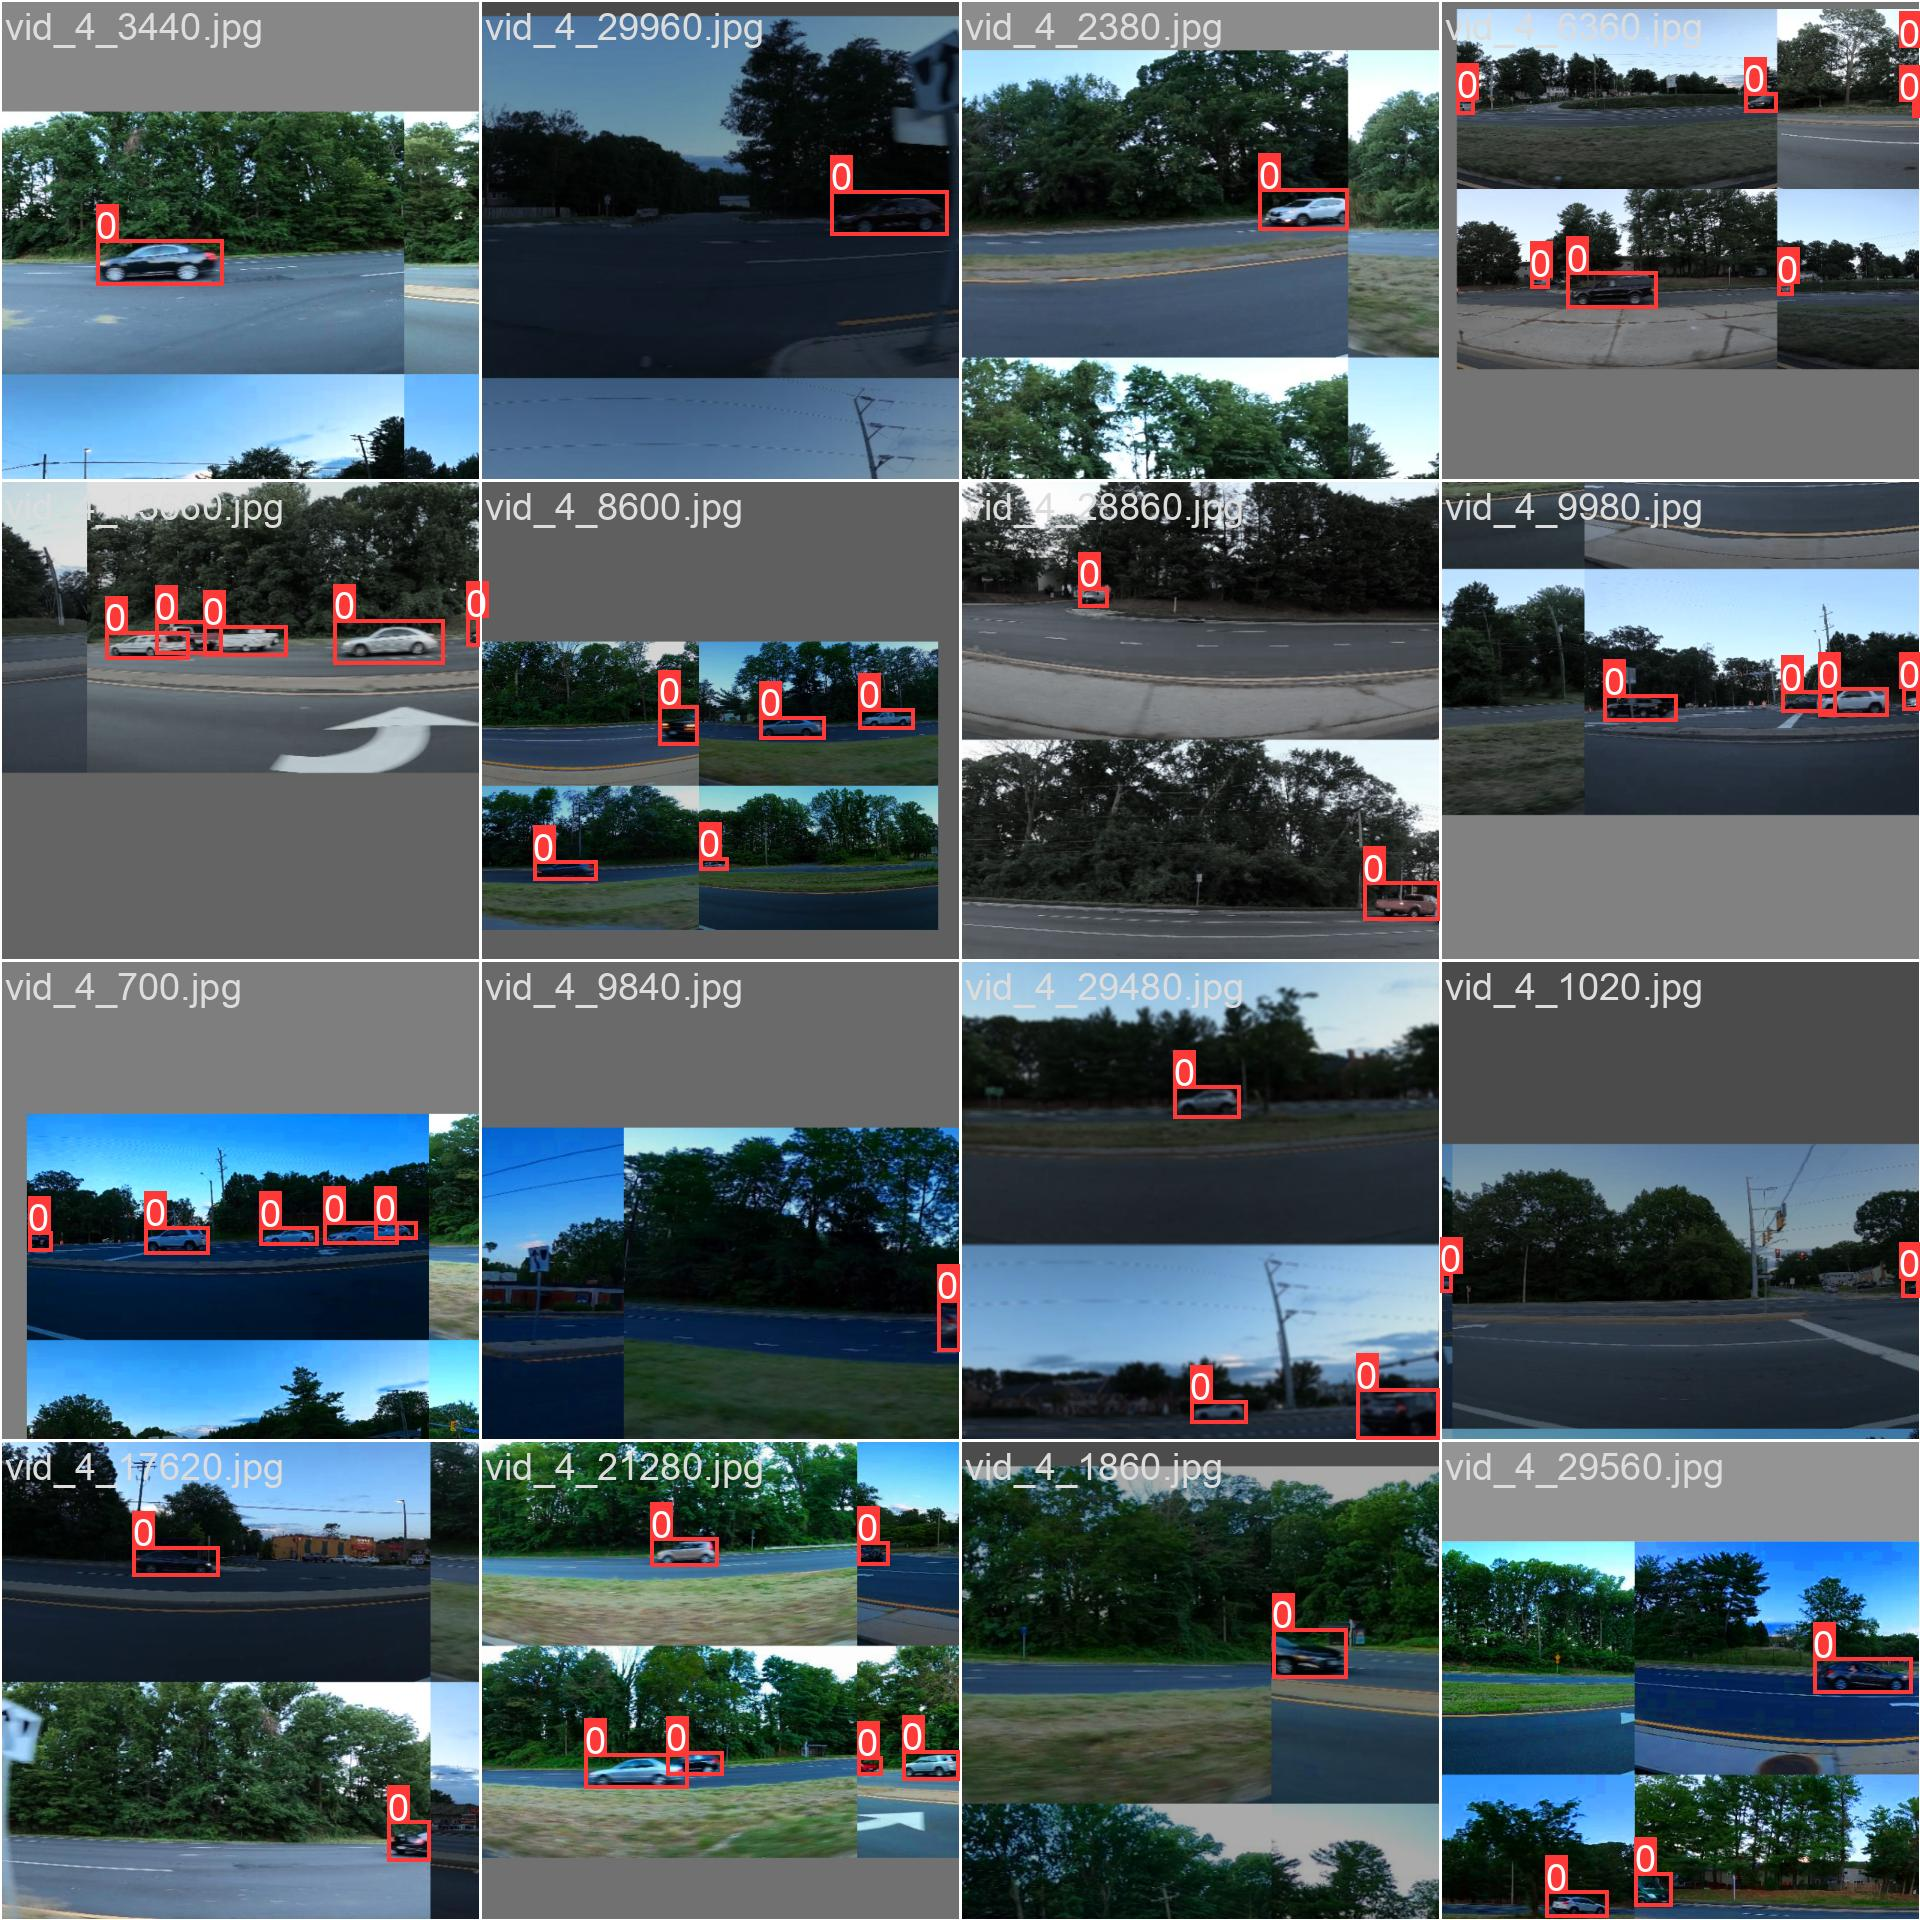

In [45]:
Image(filename='/kaggle/working/yolov5/runs/train/car_detect_results/train_batch0.jpg', width=1000)

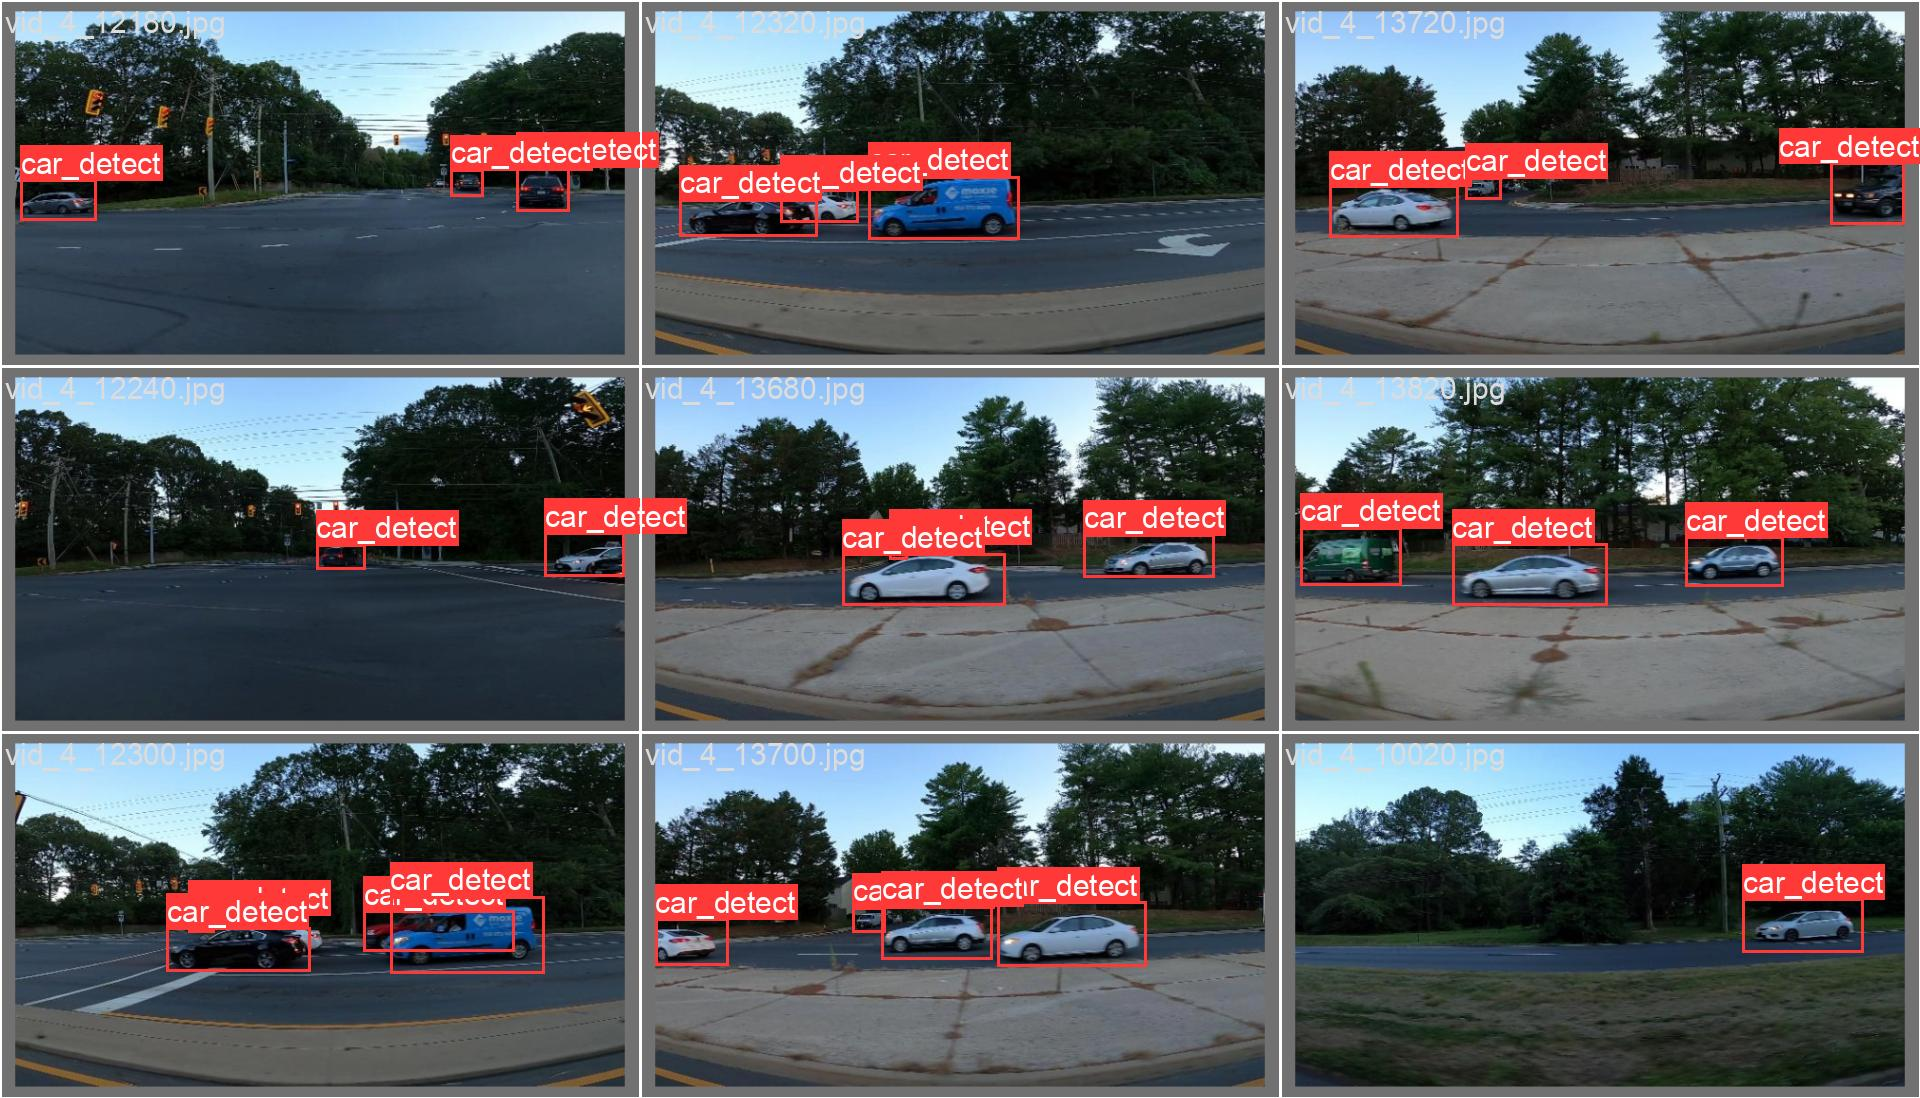

In [46]:
Image(filename='/kaggle/working/yolov5/runs/train/car_detect_results/val_batch1_labels.jpg', width=1000)

In [48]:
!python val.py --weights runs/train/car_detect_results/weights/best.pt --data ./car_detect/data.yaml --img 640 --iou 0.65

val: data=./car_detect/data.yaml, weights=['runs/train/car_detect_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-365-g12b577c8 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
custom_yolo5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /kaggle/working/yolov5/car_detect/valid/labels.cache... 73 images,
                 Class     Images  Instances          P          R      mAP50   
                   all         73        118      0.929      0.881      0.929      0.555
Speed: 0.3ms pre-process, 4.9ms inference, 5.6ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp


In [51]:
!python detect.py --weights runs/train/car_detect_results/weights/best.pt --source ./car_detect/val/images/ --img 640 --save-txt --save-conf

detect: weights=['runs/train/car_detect_results/weights/best.pt'], source=./car_detect/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-365-g12b577c8 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
custom_yolo5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/175 /kaggle/working/yolov5/car_detect/test/images/vid_5_25100.jpg: 384x640 (no detections), 29.8ms
image 2/175 /kaggle/working/yolov5/car_detect/test/images/vid_5_25120.jpg: 384x640 (no detections), 6.4ms
image 3/175 /kaggle/working/yolov5/car_detect/test/images/vid_5_2514